#### Pipeline for identifying same cell clusters
This notebook shows some of the work for identifying and labeling same cell clusters. It's not a complete representation of the pipeline, apologies. But I'll do my best to describe the protocol here and the key steps.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib widget

import numpy as np
from matplotlib import pyplot as plt
from vrAnalysis2.database import get_database
from vrAnalysis2.sessions import create_b2session
from vrAnalysis2.helpers.debug import Timer
from vrAnalysis2.analysis.same_cell_candidates import SameCellProcessor
from vrAnalysis2.analysis.same_cell_candidates import (
    plot_correlation_vs_distance,
    plot_plane_pair_histograms,
    plot_cluster_size_distribution,
    plot_distance_distribution,
    plot_roi_removal_analysis,
    ClusterExplorer,
)
from vrAnalysis2.analysis.same_cell_candidates.base import SameCellParams, SameCellClusterParameters

sessiondb = get_database('vrSessions')

In [12]:
spks_type = "corrected"

random_choice = True
if random_choice:
    import random
    session = random.choice(sessiondb.iter_sessions(imaging=True, dontTrack=False, session_params={"spks_type": "corrected"}))

else:
    mouse_name = "ATL012"
    date = "2023-01-20"
    session_id = "702"
    session = create_b2session(mouse_name, date, session_id, dict(spks_type=spks_type))

print(session)

B2Session(mouse_name='ATL022', date='2023-04-27', session_id='702')


In [13]:
cluster_params = SameCellClusterParameters()
processor_params = SameCellParams(
    spks_type=cluster_params.spks_type,
    keep_planes=cluster_params.keep_planes,
    good_labels=cluster_params.good_labels,
    npix_cutoff=cluster_params.npix_cutoff,
)
scp = SameCellProcessor(session, processor_params).load_data()

In [14]:
explorer = ClusterExplorer(scp)

In [17]:
explorer.deploy()

0


TypeError: cannot unpack non-iterable numpy.int64 object

In [48]:
from vrAnalysis2.helpers.signals import autocorrelation

# Explore how autocorrelation relates to label
activity = session.spks
labels = session.roicat_classifier["class_predictions"]

# Group activity by labels (on axis=1 of activity)
grouped_activity = []
class_name = [session.roicat_classifier["label_to_description"][session.roicat_classifier["id_to_label"][id]] for id in np.unique(labels)]
for label in np.unique(labels):
    grouped_activity.append(activity[:, labels == label])

In [49]:
# Compute autocorrelation for each group
autocorrelations = [autocorrelation(group, axis=0) for group in grouped_activity]

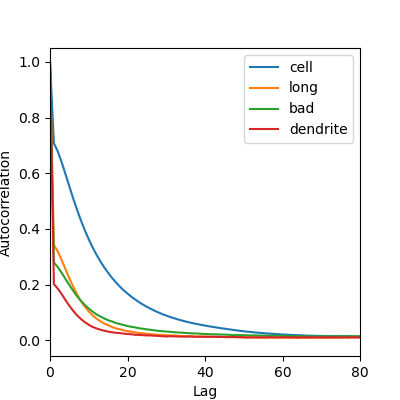

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for ilabel, label in enumerate(np.unique(labels)):
    ax.plot(np.mean(autocorrelations[ilabel], axis=1), label=class_name[ilabel])
ax.legend()
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_xlim(0, 80)
plt.show()

In [ ]:
clusters = explorer.clusters


In [18]:
show_cluster_size = False
if show_cluster_size:
    plot_cluster_size_distribution(scp, verbose=False)

In [60]:
show_correlation_vs_distance = True
if show_correlation_vs_distance:
    viewer = plot_correlation_vs_distance(scp)
    viewer.deploy(env="notebook")

C:\Users\Andrew\Documents\GitHub\vrAnalysis\vrAnalysis2\analysis\same_cell_candidates\visualize.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 4), layout="constrained")


No such comm: d39f4ad8f9cd4b0b99ea16f27c61bd1c
No such comm: d39f4ad8f9cd4b0b99ea16f27c61bd1c
